In [1]:
import pandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.basemap import Basemap

In [4]:
df = pandas.read_csv('food_inspections.csv')

# The data is imported
#### Let's see what's going on here... 🔎

In [5]:
df

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1979098,CHICAGO WINGZ AROUND THE WORLD,CHICAGO WINGZ AROUND THE WORLD,2501302.0,Restaurant,Risk 2 (Medium),3849 W MADISON ST,CHICAGO,IL,60624.0,01/06/2017,License Re-Inspection,Pass,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.880654,-87.722738,"(41.880654149623446, -87.72273803344112)"
1,1979101,NORTHSTAR COFFEE,NORTHSTAR COFFEE,50696.0,HOT DOG STATION,Risk 2 (Medium),200-232 W 87TH ST,CHICAGO,IL,60620.0,01/06/2017,Complaint,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.736262,-87.629065,"(41.7362616993756, -87.62906471642536)"
2,1979095,"WENDY'S PROPERTIES,LLC",WENDY'S,2405951.0,Restaurant,Risk 1 (High),8645 S STONY ISLAND AVE,CHICAGO,IL,60617.0,01/06/2017,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.737407,-87.585069,"(41.73740694106813, -87.58506914027942)"
3,1979094,WINDY CITY HOT DOGS INC,WINDY CITY HOT DOGS INC,1245171.0,Restaurant,Risk 1 (High),4205 W 63RD ST,CHICAGO,IL,60629.0,01/06/2017,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.778486,-87.727886,"(41.77848613692535, -87.72788606162167)"
4,1979092,TAQUERIA MORAN,TAQUERIA MORAN,1301176.0,Restaurant,Risk 1 (High),2226 N CALIFORNIA AVE,CHICAGO,IL,60647.0,01/06/2017,Canvass,Fail,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.922504,-87.697496,"(41.92250425828032, -87.69749596069143)"
5,1979091,"ALMAIDA, INC.",ALMAIDA,2390547.0,Restaurant,Risk 1 (High),4358-4360 N ELSTON AVE,CHICAGO,IL,60641.0,01/06/2017,Canvass,Fail,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.959952,-87.728498,"(41.959951934694594, -87.72849754956722)"
6,1979090,MR. ELOTE,MR. ELOTE,2279261.0,Restaurant,Risk 1 (High),7601 S CICERO AVE,CHICAGO,IL,60652.0,01/06/2017,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.754660,-87.741385,"(41.75466012439374, -87.74138475860521)"
7,1979088,MEME WOK,MEME WOK,2492533.0,Restaurant,Risk 1 (High),7601 S CICERO AVE,CHICAGO,IL,60652.0,01/06/2017,Canvass,Out of Business,NaN,41.754660,-87.741385,"(41.75466012439374, -87.74138475860521)"
8,1979085,C'EST BIEN THAI,C'EST BIEN THAI,2492926.0,Restaurant,Risk 1 (High),3900 N LINCOLN AVE,CHICAGO,IL,60613.0,01/06/2017,Suspected Food Poisoning,Pass w/ Conditions,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.952343,-87.677657,"(41.952343305200465, -87.6776567659055)"
9,1979084,POTTER'S,POTTER'S,1381720.0,Restaurant,Risk 1 (High),17 E MONROE ST,CHICAGO,IL,60603.0,01/06/2017,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.880665,-87.627089,"(41.88066457839605, -87.6270893644417)"


In [6]:
len(df) # How many observations do we have?

141864

In [7]:
len(df['AKA Name'].unique()) # How many different restaurant businesses do we have? (a rough proxy)

22759

In [8]:
df.columns # What information is contained in each record?

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [9]:
df.groupby('Inspection Type').size().sort_values(ascending=False).head(20) # Most common inspection types

Inspection Type
Canvass                                   75519
License                                   18069
Canvass Re-Inspection                     14122
Complaint                                 12604
License Re-Inspection                      6744
Short Form Complaint                       5508
Complaint Re-Inspection                    5203
Suspected Food Poisoning                    677
Consultation                                657
License-Task Force                          605
Tag Removal                                 603
Out of Business                             284
Task Force Liquor 1475                      254
Recent Inspection                           187
Complaint-Fire                              161
Suspected Food Poisoning Re-inspection      159
Short Form Fire-Complaint                   113
Special Events (Festivals)                   61
No Entry                                     60
Package Liquor 1474                          44
dtype: int64

In [10]:
df['Results'].unique() # What are the possible inspection results?

array(['Pass', 'Pass w/ Conditions', 'Fail', 'Out of Business', 'No Entry',
       'Not Ready', 'Business Not Located'], dtype=object)

In [11]:
df.groupby('Results').size().sort_values(ascending=False) # How common is each result?

Results
Pass                    83601
Fail                    27471
Pass w/ Conditions      13315
Out of Business         13153
No Entry                 3672
Not Ready                 593
Business Not Located       59
dtype: int64

In [12]:
df = df[df['Results'].str.contains('Pass|Fail|Pass w/ Conditions')] # Let's focus on the three most common

# Visualization & Analysis
To make things a little easier we will map the outcomes to number values.
- `Pass` → 2
- `Pass w/ Conditions` → 1
- `Fail` → 0

In [13]:
result_score_mapping = {
    'Pass': 2,
    'Pass w/ Conditions': 1,
    'Fail': 0
}
df['Results Scores'] = df['Results'].replace(result_score_mapping)

/Users/amanda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


###### To better organize our work, we will aggregate data with the average and the number of inspections

In [14]:
score_df = df[['AKA Name', 'Address','Results Scores','Latitude', 'Longitude']].groupby(['AKA Name', 'Address','Latitude','Longitude']).agg(['mean', 'count'])['Results Scores'].sort_values('mean')

In [15]:
failed_df = score_df[score_df['mean'] == 0].sort_values('count', ascending=False) # Restaurants that failed all inspections

In [16]:
len(failed_df)

607

In [17]:
len(failed_df[failed_df['count'] > 1]) # The number of restaurants failing all inspections (more than one inspection)

89

# 17 Restaurants to investigate...
There were 17 restaurants to have 3 or 4 failed inspections.

In [18]:
failed_gt_2_df = failed_df[failed_df['count'] > 2] # Failed all inspections, minimum of three inspections

In [19]:
len(failed_gt_2_df)

17

In [20]:
failed_gt_2_df

,,,,mean,count
AKA Name,Address,Latitude,Longitude,,
LAS ASADAS MAR Y TIERRA,4014 W 26TH ST,41.844356,-87.725205,0.0,4
71ST DISCOUNT STORE,2016 E 71 ST ST,41.766359,-87.575567,0.0,4
"63RD FOOD MART, INC",6317 S DR MARTIN LUTHER KING JR DR,41.779608,-87.615463,0.0,4
GATEWAY NEWS STAND,15 W 79TH ST,41.750830,-87.625180,0.0,3
EL LAR'S,8431 S COTTAGE GROVE AVE,41.741208,-87.604806,0.0,3
GLADYS,6922 S STONY ISLAND AVE,41.769025,-87.586450,0.0,3
IN & OUT FAST FOOD,2815 W DIVERSEY AVE,41.931982,-87.698322,0.0,3
PAK SUBMARINE,6252 S ASHLAND AVE,41.779724,-87.664374,0.0,3
LITTLE JIM'S/BIG JIM'S,3501-3505 N HALSTED ST FL 1,41.945510,-87.649285,0.0,3


### Observation
Restaurants recieving only failed inspections more than two times appear to be closed.

# Maps
Here we plot the restaurants with only failed inspections on the map. Locations represented with red dots have three or more failed inspections. Those with orange dots have two failed inspections. Yellow dots have only one inspection, which resulted in failure.

In [58]:
failed_2_df = failed_df[failed_df['count'] == 2] # Failed both of its inspections
failed_1_df = failed_df[failed_df['count'] == 1] # Failed its only inspection

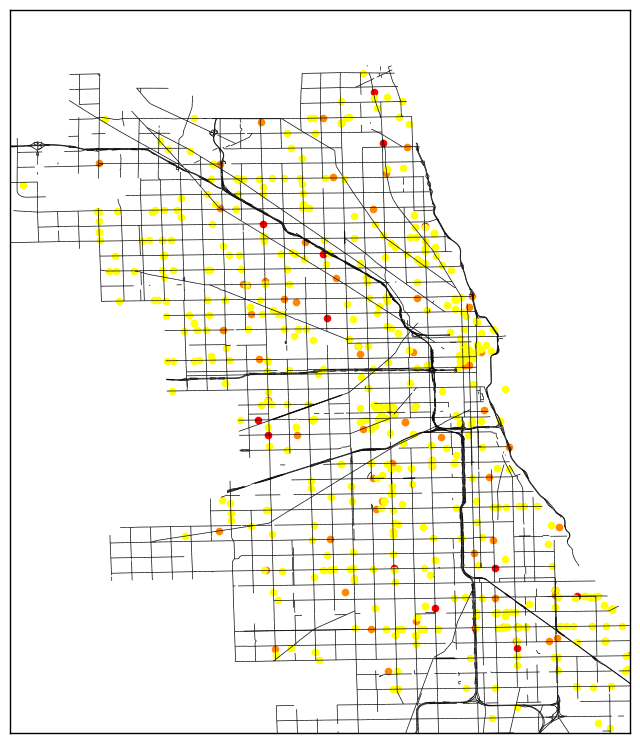

In [67]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,10))
    
m = Basemap(projection='cyl', lat_0 = 41.85, lon_0 = -87.63,
    resolution = 'h', area_thresh = 0.001,
    llcrnrlon=-87.85, llcrnrlat=41.7,
    urcrnrlon=-87.55, urcrnrlat=42.05)
    
m.drawmapboundary()
m.readshapefile('/Users/amanda/Downloads/Major_20Streets/Major_Streets_LL', 'streetmap')

longitude, latitude = failed_gt_2_df.index.get_level_values(3), failed_gt_2_df.index.get_level_values(2)
# longitude, latitude = m(failed_gt_2_df.index.get_level_values(3), failed_gt_2_df.index.get_level_values(2))
# latitude = failed_gt_2_df.index.get_level_values(2)
m.scatter(longitude, latitude, color='#ff0000', marker='o')
longitude, latitude = failed_2_df.index.get_level_values(3), failed_2_df.index.get_level_values(2)
m.scatter(longitude, latitude, color='#ff8800', marker='o')
longitude, latitude = failed_1_df.index.get_level_values(3), failed_1_df.index.get_level_values(2)
m.scatter(longitude, latitude, color='#ffff00', marker='o')
plt.show()

# That's all for now, thanks for reading